### Visualising ERA5 Data using Magics

This very first example shows how to download ERA5 Data from the [Copernicus Climate Datastore](https://cds.climate.copernicus.eu/#!/home) 
using the [cdsapi](https://cds.climate.copernicus.eu/api-how-to), and use [Magics](https://confluence.ecmwf.int/display/MAGP/Magics) to visualise the result. 

In [2]:
import cdsapi

c = cdsapi.Client()
grib = "t1000.grib"

c.retrieve("reanalysis-era5-pressure-levels",
    {
        "variable": "temperature",
        "pressure_level": "1000",
        "product_type": "reanalysis",
        "year": "2008",
        "month": "01",
        "day": "01",
        "time": "12:00",
        "format": "grib"
    },
    grib
)

2020-09-01 21:16:46,627 INFO Welcome to the CDS
2020-09-01 21:16:46,629 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2020-09-01 21:16:47,578 INFO Request is completed
2020-09-01 21:16:47,579 INFO Downloading http://136.156.133.37/cache-compute-0011/cache/data1/adaptor.mars.internal-1598725287.3264012-21523-13-bfe57e1a-d0aa-4117-a3f6-91fd0b378956.grib to t1000.grib (2M)
2020-09-01 21:16:48,205 INFO Download rate 3.2M/s   


Result(content_length=2076600,content_type=application/x-grib,location=http://136.156.133.37/cache-compute-0011/cache/data1/adaptor.mars.internal-1598725287.3264012-21523-13-bfe57e1a-d0aa-4117-a3f6-91fd0b378956.grib)

The data are now ready to be visualised. Here we use an automatic styling. Designed at ECMWF these styles adapted to the parameters to be visualised. We also add a legend and a title, to give more information about the data displayed.

Magics-warning: ecCodes: cannot find key [projTargetString]  - Key/value not found

Magics-warning: ecCodes: cannot find key [typeOfGeneratingProcess]  - Key/value not found

Magics-warning: ecCodes: cannot find key [typeOfGeneratingProcess]  - Key/value not found



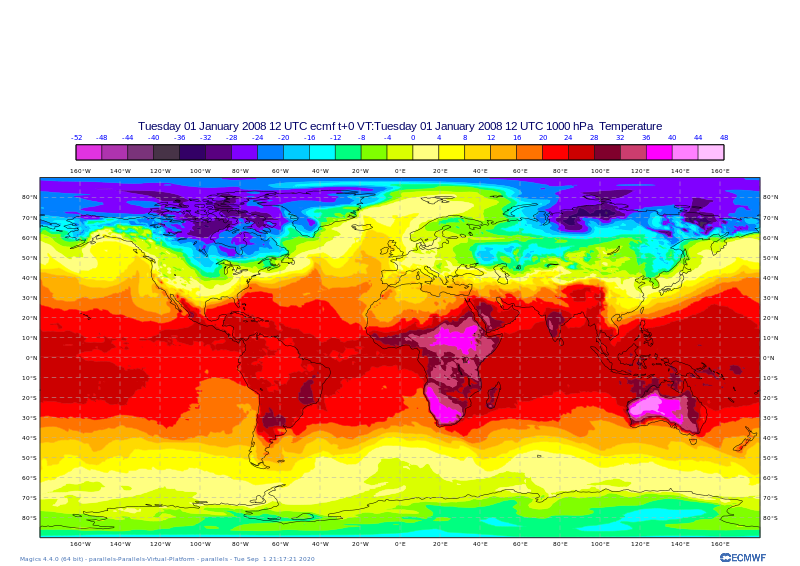

In [4]:
from Magics import macro as magics


data = magics.mgrib(grib_input_file_name = grib)

contour = magics.mcont(contour_automatic_setting = 'ecmwf', 
                       legend= True)

legend = magics.mlegend(legend_display_type = 'continuous')
title = magics.mtext()

coastlines = magics.mcoast(map_grid_colour='grey', 
                           map_grid_line_style='dash')

magics.plot(data, contour, coastlines, legend, title)
